<a href="https://colab.research.google.com/github/ismailyou/named_entity_reco/blob/main/Named_Enitity_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Named Entity Recognition - NER

<div class="alert alert-info"><font color=black>**— sometimes referred to as entity chunking, extraction, or identification —**</font></div>

No algorithm can 100% identify all the named entities correctly

## THE PLAN :

1.   What does NER mean ?
2.   How NER works ?
3.   Why it is important?
3.   Named Entity Recognition use cases
4.   Load Dependencies
5.   Load Corpus
    - Web Scraping using BeautifulSoup
    - load to the drive
6.   Basic Named Entity (NE) tagging using NLTK
    - Word Based
    - Sentence Based
7.   More powerful package
    - Stanford NLP NER
    - Spacy


## What does NER mean ?

Is the task of identifying and categorizing key information (entities) in text. An entity can be any word or series of words that consistently refers to the same thing. Every detected entity is classified into a predetermined category. For example, an NER machine learning (ML) model might detect the word “Google” in a text and classify it as a “Company”.

**e.g:**

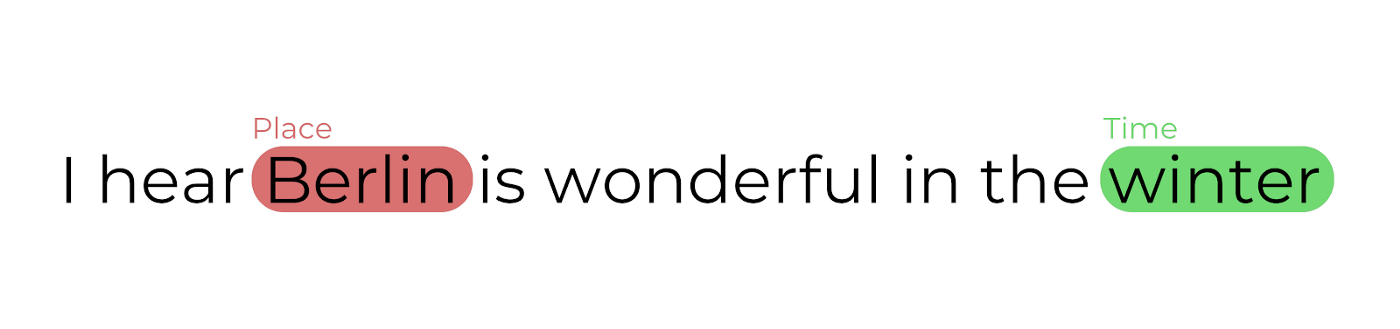

## How NER works ?

At the heart of any NER model is a two step process:
1.  Detect a named entity : this step involves detecting a word or string of words that form an entity. Each word represents a token. Inside-outside-beginning tagging is a common way of indicating where entities begin and end.

2.  Categorize the entity : This step requires the creation of entity categories. Here are some common entity categories:

These are just a few examples

  - **Person** 
  - **Organization** 
  - **Time**
  - **Location**
  - **Work of art**

## Why it is important ?

With NER, we can understand the subject or theme of a body of text and quickly group texts based on their relevancy or similarity.


<div class="alert alert-info">**Any NLP task which involves automatically understanding text and acts based on it, needs Named Entity Recognition in its pipeline**</div>



## Named Entity Recognition use cases

**`Wherever there are large quantities of text, NER can make life easier`**

* **Academia**
Enable students and researchers to find relevant material faster by summarizing papers and archive material and highlighting key terms, topics, and themes

* **Human resources** : Speed up the hiring process by summarizing applicants’ CVs.

* **Search and recommendation engines** : 
Improve the speed and relevance of search results and recommendations by summarizing descriptive text, reviews, and discussions.

* **Health care**
Improve patient care standards and reduce workloads by extracting essential information from lab reports
<br>[Roche](https://conferences.oreilly.com/strata/strata-ca-2019/public/schedule/detail/72568.html) is doing this with pathology and radiology reports

## Load Dependencies

We are using 
  - [NLTK](https://www.nltk.org/) provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming,
  - [SpaCy](https://spacy.io/) spaCy is an open-source Python library that parses and “understands” large volumes of text. 
  - [Stanford NER](https://nlp.stanford.edu/software/CRF-NER.shtml) is a Java implementation of a Named Entity Recognizer. Named Entity Recognition (NER) labels sequences of words in a text which are the names of things..

In [ ]:
import spacy
import nltk


print("SpaCy Version :", spacy.__version__)
print("nltk Version :", nltk.__version__)

SpaCy Version : 2.2.4
nltk Version : 3.2.5


## Load Corpus

### Web Scraping using Requests and BuetufulSoup

In [ ]:
import requests
from bs4 import BeautifulSoup

print("requests Version :", requests.__version__)

requests Version : 2.23.0


Am geting an article about a Berber queen 7th centry, **Feel free** to replace the URL to your favorite article in the wikipedia page.

In [ ]:
url  = "https://en.wikipedia.org/wiki/Dihya";

file = "/content/datas.txt"

s = requests.get(url)

data = s.text.encode("utf-8")

soup = BeautifulSoup(data, "lxml")

heading = soup.find("h1", {"id": "firstHeading"})

content = soup.findAll("p")

with open(file, "a+") as f:
  f.write(str(heading.get_text())+ "\n")
  for i in content:
    f.write(i.get_text())



In [ ]:
urls = {
    "english" : "https://en.wikipedia.org/wiki/Morocco",
    "french" : "https://fr.wikipedia.org/wiki/Maroc",
    "arabic" : "https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D9%85%D8%BA%D8%B1%D8%A8",
    "darija" : "https://ary.wikipedia.org/wiki/%D8%A7%D9%84%D9%85%D8%BA%D8%B1%D9%8A%D8%A8",
}

file = "/content/datas_{name}.txt"

for key in urls:
    print(key, 'language')
    s = requests.get(urls[key])

    data = s.text.encode("utf-8")

    soup = BeautifulSoup(data, "lxml")

    # heading = soup.find("h1", {"id": "firstHeading"})

    content = soup.findAll("p")

    file = "/content/data_"+ key +".txt"
    print("Creating : ", file)

    with open(file, "w+") as f:
      # f.write(str(heading.get_text())+ "\n")
      for i in content:
        f.write(i.get_text())


english language
Creating :  /content/data_english.txt
french language
Creating :  /content/data_french.txt
arabic language
Creating :  /content/data_arabic.txt
darija language
Creating :  /content/data_darija.txt


### Load to drive

upload the data to drive to feautur uses

In [ ]:
from google.colab import drive

file_names = [
      "/content/data_english.txt", "/content/data_french.txt",
      "/content/data_arabic.txt", "/content/data_darija.txt"
]

drive.mount('/content/drive')
#path = '/content/drive/MyDrive/data/data_wiki.txt'
data = {}
prefix_path = "/content/drive/MyDrive"
for file in file_names:
  path = prefix_path + "" + file
  print("The content of ", path, "\n")
  with open(path, 'w') as fwrite:
    with open(file, "r") as fread:
      data[file[9: -4]] = fread.read()
    fwrite.write(data[file[9: -4]])

Mounted at /content/drive
The content of  /content/drive/MyDrive/content/data_english.txt 

The content of  /content/drive/MyDrive/content/data_french.txt 

The content of  /content/drive/MyDrive/content/data_arabic.txt 

The content of  /content/drive/MyDrive/content/data_darija.txt 



In [ ]:
data

{'data_arabic': 'المَغْرِبُ رسميًا المَمْلَكَةُ المَغْرِبِيَّةُ (بالأمازيغية: ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ، تاكُلديت ن لمغريب) هي دولة إسلامية[19] تقع في أقصى غرب شمال أفريقيا، عاصمتها الرباط وأكبر مدنها الدار البيضاء؛ تُطل على البحر المتوسط شمالًا والمحيط الأطلسي غربًا، وتحدها الجزائر شرقًا[20] وموريتانيا جنوبًا؛[21] وفي الشريط البحري الضيق الفاصل بين المغرب وإسبانيا توجد مكتنفات متنازع عليها بين البلدين وهي سبتة ومليلية وعدد من الجُزر.[22]\nيَنص الدستور على أن الدولة إسلامية وأن البلاد متعددة الثقافات: «المملكة المغربية دولة إسلامية (...) الموحدة بانصهار كل مكوناتها، العربية الإسلامية، والأمازيغية، والصحراوية الحسانية، والغنية بروافدها الأفريقية والأندلسية والعبرية والمتوسطية».[6][19]\nالمغرب عضو في جامعة الدول العربية، الاتحاد من أجل المتوسط، والاتحاد الأفريقي؛[23] توجد شراكة استراتيجية مع مجلس التعاون الخليجي،[24] شراكة اقتصادية مع الاتحاد الأوروبي،[25] شراكة عسكرية مع حلف شمال الأطلسي،[26] كما يوجد توجه نحو الاستثمار بالبلدان الأفريقية.[27]\nالمغرب دولة ذات نظام ملكي دستوري ببرلمان يتم انتخاب

### Data Cleansing

In [ ]:
import re
def clean_data(text):
    text=text.encode("utf-8",errors='ignore').decode("utf-8")
    text=re.sub("https?:.*(?=\s)",'',text)
    text=re.sub("[’‘\"]","'",text)
    text=re.sub("[^\x00-\x7f]+",'',text)
    text=re.sub('[#&\\*+/<>@[\]^`{|}~ \t\n\r]',' ',text)
    text=re.sub('\(.*?\)','',text)
    text=re.sub('\=\=.*?\=\=','',text)
    text=re.sub(' , ',',',text)
    text=re.sub(' \.','.',text)
    text=re.sub("  +",' ',text)
    text=re.sub(";",'and',text)
    return text.strip()

In [ ]:
english_text = clean_data(data["data_english"])
french_text = clean_data(data["data_french"])
arabic_text = clean_data(data["data_arabic"])

In [ ]:
english_text

"Coordinates:.mw-parser-output.geo-default,.mw-parser-output.geo-dms,.mw-parser-output.geo-dec display:inline.mw-parser-output.geo-nondefault,.mw-parser-output.geo-multi-punct display:none.mw-parser-output.longitude,.mw-parser-output.latitude white-space:nowrap 32N 6W 32N 6W 32and -6 Morocco, a officially the Kingdom of Morocco, b is the northwesternmost country in the Maghreb region of North Africa. It overlooks the Mediterranean Sea to the north and the Atlantic Ocean to the west, and has land borders with Algeria to the east, and the disputed territory of Western Sahara to the south. Morocco also claims the Spanish exclaves of Ceuta, Melilla and Pen de Vlez de la Gomera, and several small Spanish-controlled islands off its coast. 13 It spans an area of 446,550km2 or 710,850km2,b with a population of roughly 37 million. Its official and predominant religion is Islam, and the official languages are Arabic and Berberand the Moroccan dialect of Arabic and French are also widely spoken. 

In [ ]:
french_text

"Pages pour les diteurs dconnects Royaume du Maroc 1 en arabe: 34 2 Nord 6 51 Ouestmodifier Le Maroc,ou depuis 1957, en forme longue le royaume du Maroc, autrefois appel Empire chrifien, est un tat unitaire rgionalis situ en Afrique du Nord. Son rgime politique est une monarchie constitutionnelle. Sa capitale administrative et politique est Rabat et sa plus grande ville, ainsi que sa capitale conomique, est Casablanca. Gographiquement, il est notamment caractris par des zones montagneuses ou dsertiques et est l'un des seuls pays avec l'Espagne et la France comporter des rives sur la mer Mditerrane d'un ct et l'ocan Atlantique de l'autre. Sa population est de prs de 34millions d'habitants et sa superficie de 446550km2 19 ,ou de 710850km2 en incluant le Sahara occidental 20,21 ex-Sahara espagnol, considr comme un territoire non autonome par l'Organisation des Nations unies 2 dont il administre de facto environ 80% et qu'il revendique dans sa totalit, tout comme le Front Polisario. Sa cul

In [ ]:
arabic_text

"19 20 21 . 22 : . 6 19 23 24 25 26 . 27 . 6 45,44% 28 125 . 29 . 30 31 40 32 . 33 34 35 . 36 . 37 : ' ' ' ' ' ' . 38 ' ' 34 ' ' 39 40 : . 1991 2017 300.000 . 41 42 : . 43 20.000 5000 . 44 . 45 5000 . . . 46 47 : . 43 . 48 '' ' '. 49 50 51 . 52 . 53 54 . 55 56 . 57 . 58 285 . 59 . 60 61 670 . 65 . 66 67 788. 68 789 808 . 69 786 . 70 71 803. 72 73 74 75 . 76 . 77 1659. 79 1631 1666. 80 81 1684 . 82 1787. 83 84 . 1777 . 85 86 : 87 1510 1822 . 90 91 9 -. 92 93 94 95 . 96 1912 1925: . 97 : : : . 97 1529 . 1517 99 . 100 1514 . 101 1591 . 102 103 104 . 105 106 1787. 107 108 . 110 15. 111 7% . 112 90 . 90 87 . 90 1907 1912 113 7 1906 114 115 1923. 116 117 . 118 11 1944 . 119 29 1956. 120 1958. 121 122 3 1961 1962 . 123 1969. 124 125 1975 . 126 33,986,655 2017. 127 . 128 . 129 130 265 1948 2018 2.200 . 131 2015 250 250 150 150 100. 132 700,000 133 . 134 1,1% 380 2009. 135 . 136 137 138 150 139 . 140 50% . 141 . 142 . 6 13,5 32 45% 143 144 : . 145 15 . . 50% 90% . 2006 . 147 . 2000 . 148 41% 5 

#### Cleaning Arabic corpus

In [ ]:
def clean_arabic(data):
  text = ''.join([i if ord(i) > 128 or i == '.' else ' ' for i in data])
  text = text.encode("utf-8",errors='ignore').decode("utf-8")
  text=re.sub("https?:.*(?=\s)",'',text)
  text=re.sub("[’‘\"]","'",text)
  text=re.sub('[#&\\*+/<>@[\]^`{|}~ \t\n\r]',' ',text)
  text=re.sub('\(.*?\)','',text)
  text=re.sub('\=\=.*?\=\=','',text)
  text=re.sub(' , ',',',text)
  text=re.sub(' \.','.',text)
  text=re.sub("  +",' ',text)
  text=re.sub("(;|▲|\ufeff|°|ã|\u2002|é|É|è|«|»)",'',text)
  text=re.sub("[\xa0]",'',text)
  text = ' '.join([i for i in text.split() if len(i) > 1 or i == "."])
  return text

arabic_text = clean_arabic(data["data_arabic"])
len(arabic_text.split("."))

330

In [ ]:
arabic_text = clean_arabic(data["data_arabic"])
darija_text = clean_arabic(data["data_darija"])

In [ ]:
data["data_arabic"]

'المَغْرِبُ رسميًا المَمْلَكَةُ المَغْرِبِيَّةُ (بالأمازيغية: ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ، تاكُلديت ن لمغريب) هي دولة إسلامية[19] تقع في أقصى غرب شمال أفريقيا، عاصمتها الرباط وأكبر مدنها الدار البيضاء؛ تُطل على البحر المتوسط شمالًا والمحيط الأطلسي غربًا، وتحدها الجزائر شرقًا[20] وموريتانيا جنوبًا؛[21] وفي الشريط البحري الضيق الفاصل بين المغرب وإسبانيا توجد مكتنفات متنازع عليها بين البلدين وهي سبتة ومليلية وعدد من الجُزر.[22]\nيَنص الدستور على أن الدولة إسلامية وأن البلاد متعددة الثقافات: «المملكة المغربية دولة إسلامية (...) الموحدة بانصهار كل مكوناتها، العربية الإسلامية، والأمازيغية، والصحراوية الحسانية، والغنية بروافدها الأفريقية والأندلسية والعبرية والمتوسطية».[6][19]\nالمغرب عضو في جامعة الدول العربية، الاتحاد من أجل المتوسط، والاتحاد الأفريقي؛[23] توجد شراكة استراتيجية مع مجلس التعاون الخليجي،[24] شراكة اقتصادية مع الاتحاد الأوروبي،[25] شراكة عسكرية مع حلف شمال الأطلسي،[26] كما يوجد توجه نحو الاستثمار بالبلدان الأفريقية.[27]\nالمغرب دولة ذات نظام ملكي دستوري ببرلمان يتم انتخابه.[6] في الانتخا

In [ ]:
arabic_text

'المَغْرِبُ رسميًا المَمْلَكَةُ المَغْرِبِيَّةُ بالأمازيغية ⵜⴰⴳⵍⴷⵉⵜ ⵍⵎⵖⵔⵉⴱ، تاكُلديت لمغريب هي دولة إسلامية تقع في أقصى غرب شمال أفريقيا، عاصمتها الرباط وأكبر مدنها الدار البيضاء؛ تُطل على البحر المتوسط شمالًا والمحيط الأطلسي غربًا، وتحدها الجزائر شرقًا وموريتانيا جنوبًا؛ وفي الشريط البحري الضيق الفاصل بين المغرب وإسبانيا توجد مكتنفات متنازع عليها بين البلدين وهي سبتة ومليلية وعدد من الجُزر. يَنص الدستور على أن الدولة إسلامية وأن البلاد متعددة الثقافات المملكة المغربية دولة إسلامية ... الموحدة بانصهار كل مكوناتها، العربية الإسلامية، والأمازيغية، والصحراوية الحسانية، والغنية بروافدها الأفريقية والأندلسية والعبرية والمتوسطية. المغرب عضو في جامعة الدول العربية، الاتحاد من أجل المتوسط، والاتحاد الأفريقي؛ توجد شراكة استراتيجية مع مجلس التعاون الخليجي، شراكة اقتصادية مع الاتحاد الأوروبي، شراكة عسكرية مع حلف شمال الأطلسي، كما يوجد توجه نحو الاستثمار بالبلدان الأفريقية. المغرب دولة ذات نظام ملكي دستوري ببرلمان يتم انتخابه. في الانتخابات الأخيرة بلغت المشاركة نسبة من إجمالي الناخبين وسجلت فوز ح

In [ ]:
data = {
    "english" : english_text,
    "french" : french_text,
    "darija" : darija_text,
    "arabic" : arabic_text
}

prefix_path = "/content/drive/MyDrive/content/"
for file in data:
  path = prefix_path + "" + file + ".txt"

  print("The content of ", path, "\n")
  with open(path, 'w') as f:
    f.write(data[file])
    

The content of  /content/drive/MyDrive/content/english.txt 

The content of  /content/drive/MyDrive/content/french.txt 

The content of  /content/drive/MyDrive/content/darija.txt 

The content of  /content/drive/MyDrive/content/arabic.txt 



### Tokenizing

In [ ]:
nltk.download('punkt')
english_text_words = nltk.word_tokenize(english_text)
english_text_sentences = nltk.sent_tokenize(english_text)

french_text_words = nltk.word_tokenize(french_text)
french_text_sentences = nltk.sent_tokenize(french_text)

arabic_text_words = nltk.word_tokenize(arabic_text)
arabic_text_sentences = nltk.sent_tokenize(arabic_text)

darija_text_words = nltk.word_tokenize(darija_text)
darija_text_sentences = nltk.sent_tokenize(darija_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Basic Named Entity (NE) tagging using NLTK

### Word Based

In [ ]:
print(len(english_text_words), "English tokens")
print(len(french_text_words), "French tokens")
print(len(arabic_text_words), "Arabic tokens")
print(len(darija_text_words), "Darija tokens")

13025 English tokens
40569 French tokens
8774 Arabic tokens
3888 Darija tokens


#### Part of speech tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
english_pos_tags = nltk.pos_tag(english_text_words)
english_pos_tags[:20]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Coordinates', 'NNS'),
 (':', ':'),
 ('.mw-parser-output.geo-default', 'NN'),
 (',', ','),
 ('.mw-parser-output.geo-dms', 'JJ'),
 (',', ','),
 ('.mw-parser-output.geo-dec', 'JJ'),
 ('display', 'NN'),
 (':', ':'),
 ('inline.mw-parser-output.geo-nondefault', 'NN'),
 (',', ','),
 ('.mw-parser-output.geo-multi-punct', 'JJ'),
 ('display', 'NN'),
 (':', ':'),
 ('none.mw-parser-output.longitude', 'JJ'),
 (',', ','),
 ('.mw-parser-output.latitude', 'JJ'),
 ('white-space', 'NN'),
 (':', ':'),
 ('nowrap', 'NN')]

#### Detect only if the word is NE or Not

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
chunks = nltk.ne_chunk(english_pos_tags, binary=True) #either NE or not NE

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import pandas as pd

entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
      entities.append(' '.join(c[0] for c in chunk))
      labels.append(chunk.label())


entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:30]


Entities Labels
0            Middle Atlas Mountains     NE
1              William S. Burroughs     NE
2                             Islam     NE
3   Moroccan Cinematographic Center     NE
4                              Aviz     NE
5                  European Muslims     NE
6                              Cuba     NE
7                              West     NE
8                          Almohads     NE
9         Moroccan National Theatre     NE
10                    Moroccan Jews     NE
11                         Rabatand     NE
12                           Ziryab     NE
13                 Northwest Africa     NE
14                           Septum     NE
15                          Ottoman     NE
16                          Perejil     NE
17                          Climate     NE
18                          Idrisid     NE
19               Hicham El Guerrouj     NE
20                          Berbers     NE
21                        Marruecos     NE
22                          Quranic     NE
23                         Moroccan     NE
24                     Song Contest     NE
25                           Sweden     NE
26                   Ottoman Empire     NE
27                            House     NE
28                              Fes     NE
29             Neighbourhood Policy     NE

In [ ]:
## Binary = False
chunks = nltk.ne_chunk(english_pos_tags, binary=False)

In [ ]:
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:50]

Entities        Labels
0                    Faithful  ORGANIZATION
1                     Persian           GPE
2                        Aviz  ORGANIZATION
3                      Hassan        PERSON
4                      Dakhla           GPE
5                      Hebrew           GPE
6                     Perejil        PERSON
7                     Climate        PERSON
8                     Tindouf           GPE
9                       Ceuta        PERSON
10        Islamic Cooperation  ORGANIZATION
11                     Africa  ORGANIZATION
12            Popular Western        PERSON
13              Berber Revolt  ORGANIZATION
14             Roman Catholic        PERSON
15       High Atlas Mountains  ORGANIZATION
16      Eastern Mediterranean      LOCATION
17         Hicham El Guerrouj        PERSON
18                  Berberand           GPE
19                   Algerian           GPE
20                     Ziryab  ORGANIZATION
21             Atlantic Ocean  ORGANIZATION
22                     Berber           GPE
23                  Almoravid  ORGANIZATION
24         Saadeddine Othmani        PERSON
25                  Transport        PERSON
26                 Portuguese           GPE
27                   Almohads  ORGANIZATION
28                  Christian           GPE
29  Reconciliation Commission  ORGANIZATION
30                    Amazigh        PERSON
31                   Tangiers  ORGANIZATION
32                  Bah Faith  ORGANIZATION
33         Tennessee Williams        PERSON
34                        Sal        PERSON
35                      ISCAE  ORGANIZATION
36                     Septum           GPE
37                     Mansur        PERSON
38           Northwest Africa           GPE
39             Abbas El Fassi        PERSON
40                   National  ORGANIZATION
41                     Saguia           GPE
42                      Large        PERSON
43                    Almohad  ORGANIZATION
44               Protectorate  ORGANIZATION
45                    Almohad           GPE
46        Mohammed Ben Brahim        PERSON
47           Emperor Claudius        PERSON
48                    Spanish  ORGANIZATION
49                     Health           GPE

we can see alot of problems with this model :

  - `New` => GPE
  - `El Jadida`  => PER


### Sentence Based

In [ ]:
print(len(english_text_sentences), "Sentences")
print(len(french_text_sentences), "Sentences")
print(len(arabic_text_sentences), "Sentences")
print(len(darija_text_sentences), "Sentences")

571 Sentences
1320 Sentences
327 Sentences
195 Sentences


In [ ]:
english_sentences = []
arabic_sentences = []
french_sentences = []
darija_sentences = []


for sentence in english_text_sentences:
  english_sentences.append(nltk.word_tokenize(sentence))

for sentence in arabic_text_sentences:
  arabic_sentences.append(nltk.word_tokenize(sentence))


for sentence in french_text_sentences:
  french_sentences.append(nltk.word_tokenize(sentence))


for sentence in darija_text_sentences:
  darija_sentences.append(nltk.word_tokenize(sentence))


In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-tagger-4.2.0.zip'
!unzip stanford-tagger-4.2.0.zip


--2021-09-01 09:35:50--  https://nlp.stanford.edu/software/stanford-tagger-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-tagger-4.2.0.zip [following]
--2021-09-01 09:35:51--  https://downloads.cs.stanford.edu/nlp/software/stanford-tagger-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78034596 (74M) [application/zip]
Saving to: ‘stanford-tagger-4.2.0.zip’

stanford-tagger-4.2 100%[===================>]  74.42M   560KB/s    in 1m 44s  

2021-09-01 09:37:35 (731 KB/s) - ‘stanford-tagger-4.2.0.zip’ saved [78034596/78034596]

Archive:  stanford-tagger-4.2.0.zip
   creating: 

In [ ]:
print(english_sentences[2])
print(arabic_sentences[2])
print(french_sentences[2])
print(darija_sentences[2])

['Morocco', 'also', 'claims', 'the', 'Spanish', 'exclaves', 'of', 'Ceuta', ',', 'Melilla', 'and', 'Pen', 'de', 'Vlez', 'de', 'la', 'Gomera', ',', 'and', 'several', 'small', 'Spanish-controlled', 'islands', 'off', 'its', 'coast', '.']
['المغرب', 'عضو', 'في', 'جامعة', 'الدول', 'العربية،', 'الاتحاد', 'من', 'أجل', 'المتوسط،', 'والاتحاد', 'الأفريقي؛', 'توجد', 'شراكة', 'استراتيجية', 'مع', 'مجلس', 'التعاون', 'الخليجي،', 'شراكة', 'اقتصادية', 'مع', 'الاتحاد', 'الأوروبي،', 'شراكة', 'عسكرية', 'مع', 'حلف', 'شمال', 'الأطلسي،', 'كما', 'يوجد', 'توجه', 'نحو', 'الاستثمار', 'بالبلدان', 'الأفريقية', '.']
['Sa', 'capitale', 'administrative', 'et', 'politique', 'est', 'Rabat', 'et', 'sa', 'plus', 'grande', 'ville', ',', 'ainsi', 'que', 'sa', 'capitale', 'conomique', ',', 'est', 'Casablanca', '.']
['لمدون', 'لكبار', 'لاخرين', 'ولمعروفين', 'هوما', 'فاس،', 'مراكش', 'سلا،', 'مكناس،', 'طنجة،', 'أݣادير،', 'آسفي،', 'تطوان،', 'وجدة،', 'بركان،', 'لعيون،', 'الحسيمة،', 'بني', 'ملال،', 'قنيطرة،', 'وارزازات', 'والداخلة

In [ ]:
entities = []
labels = []

for sent in english_sentences:
    for chunk in nltk.ne_chunk(nltk.pos_tag(sent),binary=False):
        if hasattr(chunk,'label'):
            entities.append(' '.join(c[0] for c in chunk))
            labels.append(chunk.label())
            
entities_labels = list(set(zip(entities,labels)))

entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:60]

Entities        Labels
0                    Faithful  ORGANIZATION
1                     Persian           GPE
2                      Cinema           GPE
3                        Aviz  ORGANIZATION
4                      Hassan        PERSON
5                      Dakhla           GPE
6                      Hebrew           GPE
7                     Perejil        PERSON
8                     Climate        PERSON
9                     Tindouf           GPE
10                      Ceuta        PERSON
11        Islamic Cooperation  ORGANIZATION
12                     Africa  ORGANIZATION
13              Berber Revolt  ORGANIZATION
14             Roman Catholic        PERSON
15       High Atlas Mountains  ORGANIZATION
16      Eastern Mediterranean      LOCATION
17         Hicham El Guerrouj        PERSON
18                  Berberand           GPE
19                   Skeletal           GPE
20                        Tea           GPE
21                   Algerian           GPE
22                     Ziryab  ORGANIZATION
23             Atlantic Ocean  ORGANIZATION
24                     Berber           GPE
25                  Almoravid  ORGANIZATION
26         Saadeddine Othmani        PERSON
27                  Transport        PERSON
28                 Portuguese           GPE
29                   Almohads  ORGANIZATION
30                  Christian           GPE
31                       Beef           GPE
32  Reconciliation Commission  ORGANIZATION
33                    Amazigh        PERSON
34                   Tangiers  ORGANIZATION
35                  Bah Faith  ORGANIZATION
36         Tennessee Williams        PERSON
37                        Sal        PERSON
38                       High           GPE
39                      ISCAE  ORGANIZATION
40                     Septum           GPE
41                     Mansur        PERSON
42           Northwest Africa           GPE
43             Abbas El Fassi        PERSON
44                   National  ORGANIZATION
45                     Saguia           GPE
46                    Almohad  ORGANIZATION
47               Protectorate  ORGANIZATION
48                    Almohad           GPE
49        Mohammed Ben Brahim        PERSON
50                    Spanish  ORGANIZATION
51                     Health           GPE
52                     Infant           GPE
53                   Morrocco           GPE
54                    Madeira        PERSON
55            Representatives  ORGANIZATION
56                       SADR  ORGANIZATION
57                Scandinavia           GPE
58                     Turkey           GPE
59                    Celsius        PERSON

***English text : Now its more better than last time***



1.   `Lalla Khadija Bent Belkacem` -> PERSON
2.   `Ibn Khaldun	` -> PERSON
3.   `Kutubiyya Mosque` -> ORG

beautiful Aa :)

but we have a lot of problems also in other langs, French, arabic so we can import another pos tagger for every lang and try again.



## More powerful package

### Stanford NLP NER

**Installation and Configuration:**


https://medium.com/manash-en-blog/configuring-stanford-parser-and-stanford-ner-tagger-with-nltk-in-python-on-windows-f685483c374a

**Stanford link:**

https://nlp.stanford.edu/software/CRF-NER.html

#### Import Stanford Tagger

In [ ]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip'
!unzip stanford-ner-2018-10-16.zip


--2021-09-01 09:37:43--  https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip [following]
--2021-09-01 09:37:43--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180358328 (172M) [application/zip]
Saving to: ‘stanford-ner-2018-10-16.zip’

stanford-ner-2018-1 100%[===================>] 172.00M  5.05MB/s    in 35s     

2021-09-01 09:38:19 (4.91 MB/s) - ‘stanford-ner-2018-10-16.zip’ saved [180358328/180358328]

Archive:  stanford-ner-2018-10-16.

In [ ]:
st = StanfordNERTagger('/content/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz',
                       '/content/stanford-ner-2018-10-16/stanford-ner.jar',
                       encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [ ]:
classified_text = st.tag(english_text_words)

classified_text_df = pd.DataFrame(classified_text)

classified_text_df.drop_duplicates(keep='first', inplace=True)
classified_text_df.reset_index(drop=True, inplace=True)
classified_text_df.columns = ["Entities", "Labels"]
classified_text_df[:50]

Entities    Labels
0                              Coordinates         O
1                                        :         O
2            .mw-parser-output.geo-default         O
3                                        ,         O
4                .mw-parser-output.geo-dms         O
5                .mw-parser-output.geo-dec         O
6                                  display         O
7   inline.mw-parser-output.geo-nondefault         O
8        .mw-parser-output.geo-multi-punct         O
9          none.mw-parser-output.longitude         O
10              .mw-parser-output.latitude         O
11                             white-space         O
12                                  nowrap         O
13                                     32N         O
14                                      6W         O
15                                   32and         O
16                                      -6         O
17                                 Morocco  LOCATION
18                                       a         O
19                              officially         O
20                                     the         O
21                                 Kingdom  LOCATION
22                                      of  LOCATION
23                                       b         O
24                                      is         O
25                        northwesternmost         O
26                                 country         O
27                                      in         O
28                                 Maghreb         O
29                                  region         O
30                                      of         O
31                                   North  LOCATION
32                                  Africa  LOCATION
33                                       .         O
34                                      It         O
35                               overlooks         O
36                           Mediterranean  LOCATION
37                                     Sea  LOCATION
38                                      to         O
39                                   north         O
40                                     and         O
41                                Atlantic  LOCATION
42                                   Ocean  LOCATION
43                                    west         O
44                                     has         O
45                                    land         O
46                                 borders         O
47                                    with         O
48                                 Algeria  LOCATION
49                                    east         O

In [ ]:
classified_text_df[classified_text_df['Labels'] != 'O']

Entities        Labels
17      Morocco      LOCATION
21      Kingdom      LOCATION
22           of      LOCATION
31        North      LOCATION
32       Africa      LOCATION
...         ...           ...
3514    Louardi        PERSON
3515        Ala        PERSON
3516      Alwan        PERSON
3520    Eastern      LOCATION
3568  Wikipedia  ORGANIZATION

[436 rows x 2 columns]

In [ ]:
print("- English Tag Count :", len(classified_text_df["Labels"].value_counts()))

classified_text_df["Labels"].value_counts()

- English Tag Count : 4


O               3139
ORGANIZATION     157
LOCATION         153
PERSON           126
Name: Labels, dtype: int64

In [ ]:
classified_text = st.tag(french_text_words)

classified_text_df = pd.DataFrame(classified_text)

classified_text_df.drop_duplicates(keep='first', inplace=True)
classified_text_df.reset_index(drop=True, inplace=True)
classified_text_df.columns = ["Entities", "Labels"]
classified_text_df[:50]

classified_text_df[classified_text_df['Labels'] != 'O']

Entities        Labels
5           Royaume  ORGANIZATION
6                du  ORGANIZATION
7             Maroc  ORGANIZATION
14             Nord  ORGANIZATION
17    Ouestmodifier  ORGANIZATION
...             ...           ...
8869       Merzouga      LOCATION
8874         Agnaou        PERSON
8876           Parc  ORGANIZATION
8877          Ligue  ORGANIZATION
8885          Mdina      LOCATION

[757 rows x 2 columns]

In [ ]:
print("- French Tag Count :", len(classified_text_df["Labels"].value_counts()))

classified_text_df["Labels"].value_counts()

- French Tag Count : 4


O               8136
PERSON           409
ORGANIZATION     194
LOCATION         154
Name: Labels, dtype: int64

In [ ]:
netagged_words = classified_text

entities = []
labels = []

from itertools import groupby
for tag, chunk in groupby(classified_text, lambda x:x[1]):
    if tag != "O":
        entities.append(' '.join(w for w, t in chunk))
        labels.append(tag)
        
        
entities_all = list(zip(entities, labels))
entities_unique = list(set(zip(entities, labels))) #unique entities   
entities_df = pd.DataFrame(entities_unique)
entities_df.columns = ["Entities", "Labels"]
entities_df

Entities        Labels
0                          Alger        PERSON
1             Portugal Marrocosh      LOCATION
2            Hassan El-Mouthanna        PERSON
3                          Caire        PERSON
4                         Hassan        PERSON
..                           ...           ...
590                          SAP  ORGANIZATION
591                    Qim Malte        PERSON
592             Parc de la Ligue  ORGANIZATION
593  Medersa Bou Inania de Mekns      LOCATION
594                     Idrassen      LOCATION

[595 rows x 2 columns]

### Spacy

In [ ]:
from spacy import displacy

# Perform standard imports 
english_nlp = spacy.load('en_core_web_sm')

!python -m spacy download fr_core_news_sm

import fr_core_news_sm
french_nlp = fr_core_news_sm.load()


     |████████████████████████████████| 14.7 MB 5.2 MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-py3-none-any.whl size=14727026 sha256=ca91b0535c07eef9d0565a0017dad0efd5b81473113d2f669302ead6b25fc3c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-v6sukfmu/wheels/c9/a6/ea/0778337c34660027ee67ef3a91fb9d3600b76777a912ea1c24
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
print(english_text)
print(french_text)

Coordinates:.mw-parser-output.geo-default,.mw-parser-output.geo-dms,.mw-parser-output.geo-dec display:inline.mw-parser-output.geo-nondefault,.mw-parser-output.geo-multi-punct display:none.mw-parser-output.longitude,.mw-parser-output.latitude white-space:nowrap 32N 6W 32N 6W 32and -6 Morocco, a officially the Kingdom of Morocco, b is the northwesternmost country in the Maghreb region of North Africa. It overlooks the Mediterranean Sea to the north and the Atlantic Ocean to the west, and has land borders with Algeria to the east, and the disputed territory of Western Sahara to the south. Morocco also claims the Spanish exclaves of Ceuta, Melilla and Pen de Vlez de la Gomera, and several small Spanish-controlled islands off its coast. 13 It spans an area of 446,550km2 or 710,850km2,b with a population of roughly 37 million. Its official and predominant religion is Islam, and the official languages are Arabic and Berberand the Moroccan dialect of Arabic and French are also widely spoken. M

#### Spacy : English text 

In [ ]:
english_doc = english_nlp(english_text)

entities = []
labels = []
position_start = []
position_end = []

for ent in english_doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

df

Entities    Labels  Position_Start  Position_End
0                   (nowrap, 32N)  CARDINAL             254           264
1     (the, Kingdom, of, Morocco)       GPE             306           328
2                       (Maghreb)       GPE             371           378
3                 (North, Africa)       GPE             389           401
4       (the, Mediterranean, Sea)       LOC             416           437
...                           ...       ...             ...           ...
1888                       (2030)  CARDINAL           72964         72968
1889                     (431467)  CARDINAL           72970         72976
1890                     (UNESCO)       ORG           72978         72984
1891         (UNESCO, Publishing)       ORG           72986         73003
1892                  (Wikipedia)       GPE           73132         73141

[1893 rows x 4 columns]

In [ ]:
french_doc = french_nlp(french_text)

entities = []
labels = []
position_start = []
position_end = []

for ent in french_doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
french_df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

In [ ]:
french_df

Entities Labels  Position_Start  Position_End
0            (Royaume, du, Maroc, 1)    LOC              33            51
1     (51, Ouestmodifier, Le, Maroc)    LOC              74            99
2                            (Maroc)    LOC             146           151
3                 (Empire, chrifien)    LOC             169           184
4                (Afrique, du, Nord)    LOC             224           239
...                              ...    ...             ...           ...
3054                     (Gibraltar)    LOC          232824        232833
3055            (lagune, de, Dakhla)   MISC          232838        232854
3056                     (Essaouira)    LOC          232875        232884
3057                         (Maroc)    LOC          232889        232894
3058                     (Wikimedia)    ORG          232932        232941

[3059 rows x 4 columns]

In [ ]:
displacy.render(english_doc, style='ent', jupyter=True)

In [ ]:
displacy.render(french_doc, style='ent', jupyter=True)

In [ ]:
arabic_doc = french_nlp(arabic_text)
displacy.render(arabic_doc, style='ent', jupyter=True)

In [ ]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [ ]:
print("- French Tag Count :", len(french_df["Labels"].value_counts()))

french_df["Labels"].value_counts()

- French Tag Count : 4


LOC     1685
PER      600
MISC     397
ORG      377
Name: Labels, dtype: int64

In [ ]:
print("- English Tag Count :", len(df["Labels"].value_counts()))

df["Labels"].value_counts()

- English Tag Count : 17


GPE            400
CARDINAL       295
NORP           286
DATE           254
ORG            185
PERSON         163
LOC            121
ORDINAL         51
PERCENT         49
EVENT           18
LANGUAGE        16
PRODUCT         14
FAC             13
QUANTITY        10
LAW              6
MONEY            6
WORK_OF_ART      6
Name: Labels, dtype: int64

***Spacy works the best***

#### Viewing Specific Entities
You can pass a list of entity types to restrict the visualization:

#### SpaCy NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

#### Adding a Named Entity to a Span

<font color=green>Right now, spaCy does not recognize "Berber or Amazigh" as a nationality.``NORP``</font> 

In [ ]:
for i, j in enumerate(english_text_words):
  if j.lower() == "berber" or j.lower() == "berbers" or j.lower() == "amazigh":
    print (english_text_words[i-1], j, english_text_words[i+1])

of Berber ,
the Berber words
modern Berber name
between Berbers and
the Berber kingdom
by Berber tribes
indigenous Berber tribes
the Berber Revolt
the Berbers formed
Awraba Berber tribes
of Berber dynasties
a Berber uprising
the Berber people
ancient Berber ,
have Berber ancestral
and Berber .
The Berber language
12million Berber speakers
spoke Berber .
% Amazigh ,
its Berber ,
and Berber sites
from Berber culture
Moroccan Berber architecture
traditionally Berber or
the Berbers of
, Berber ,
or Berber .
, Berber and


#### Adding Named Entities to All Matching Spans

What if we want to tag all occurrences of "Berber"? 

In [ ]:
# Import PhraseMatcher and create a matcher object:
from spacy.matcher import PhraseMatcher
english_doc = english_nlp(english_text)
matcher = PhraseMatcher(english_nlp.vocab)


# Create the desired phrase patterns:
phrase_list = ['Berber', 'Berbers', 'berber', 'berbers', "Berber tribes", 'berber tribes', "amazigh", "Amazigh"]
phrase_patterns = [english_nlp(text) for text in phrase_list]

In [ ]:
# Apply the patterns to our matcher object:
matcher.add('berber', None, *phrase_patterns)

# Apply the matcher to our Doc object:
matches = matcher(english_doc)

# See what matches occur:
matches

[(16662550597105595156, 200, 201),
 (16662550597105595156, 860, 861),
 (16662550597105595156, 875, 876),
 (16662550597105595156, 1181, 1182),
 (16662550597105595156, 1329, 1330),
 (16662550597105595156, 1400, 1401),
 (16662550597105595156, 1400, 1402),
 (16662550597105595156, 1579, 1580),
 (16662550597105595156, 1579, 1581),
 (16662550597105595156, 1652, 1653),
 (16662550597105595156, 1658, 1659),
 (16662550597105595156, 1700, 1701),
 (16662550597105595156, 1700, 1702),
 (16662550597105595156, 1791, 1792),
 (16662550597105595156, 2675, 2676),
 (16662550597105595156, 3841, 3842),
 (16662550597105595156, 7314, 7315),
 (16662550597105595156, 9269, 9270),
 (16662550597105595156, 9286, 9287),
 (16662550597105595156, 9826, 9827),
 (16662550597105595156, 9863, 9864),
 (16662550597105595156, 9882, 9883),
 (16662550597105595156, 9907, 9908),
 (16662550597105595156, 10144, 10145),
 (16662550597105595156, 10313, 10314),
 (16662550597105595156, 10401, 10402),
 (16662550597105595156, 10497, 10498),

In [ ]:
# Here we create Spans from each match, and create named entities from them:
from spacy.tokens import Span

NORP = english_doc.vocab.strings[u'NORP']

new_ents = [] 
for match in matches:
  try:
    doc.ents = list(doc.ents) + [Span(doc, match[1],match[2],label=NORP)]
  except:
    pass

In [ ]:
displacy.render(english_doc, style='ent', jupyter=True)

## Sequence Model Approach to NER

**Training**

- Collect a set of representative training example (documents)
- Annotate each token for its entity class or other (O) using **BIO** encoding scheme

- Feature engineering 
- Train a sequence tagger to predict the labels

**Test**

- Receive/Sample a set of test examples
- Run sequence model infrence to label each token
- Return the recognized entities

### Inside–outside–beginning (tagging)

Example:
<table>
  <td>Word</td>
  <td>Tag</td>
  <tr>
    <td>Alex </td>
    <td>I-PER</td>
  </tr>
    <tr>
    <td>is </td>
    <td>O</td>
  </tr>
    <tr>
    <td>going </td>
    <td>O</td>
  </tr>
  <tr>
    <td>to </td>
    <td>O</td>
  </tr>
  <tr>
    <td>Los </td>
    <td>I-Loc</td>
  </tr>
    <tr>
    <td>Angelos </td>
    <td>I-Loc</td>
  </tr>
      <tr>
    <td>in </td>
    <td>O</td>
  </tr>
      <tr>
    <td>Calefornia </td>
    <td>I-Loc</td>
  </tr>
</table>

In [ ]:
import pandas as pd
print('pandas version :', pd.__version__)
import numpy as np
print('numpy version :', np.__version__)
import matplotlib.pyplot as plt

%matplotlib inline


np.random.seed(0)

import tensorflow as tf
print('tensorflow version :', tf.__version__)


import sklearn
print("sklearn version :", sklearn.__version__)

pandas version : 1.1.5
numpy version : 1.19.5
tensorflow version : 2.6.0
sklearn version : 0.22.2.post1


### English language

#### Load The dataset

The dataset with 1M x 4 dimensions contains columns = ['# Sentence', 'Word', 'POS', 'Tag'] and is grouped by #Sentence.

URL : https://www.kaggle.com/namanj27/ner-dataset

In [ ]:
path = '/content/drive/MyDrive/data/ner_datasetreference.csv.zip'
data = pd.read_csv(path, encoding="unicode_escape")

#### Exploring The Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


NER dataset provided by kaggle. it consists of four columns

**Word**:
This column contains English dictionary words form the sentence it is taken from.

**POS**:
Parts of speech tag

**Tag**:
Standard named entity recognition tags as follows

- ORGANIZATION - Georgia-Pacific Corp., WHO

- PERSON - Eddy Bonte, President Obama

- LOCATION - Murray River, Mount Everest

- DATE - June, 2008-06-29

- TIME - two fifty a m, 1:30 p.m.

- MONEY - 175 million Canadian Dollars, GBP 10.40

- PERCENT - twenty pct, 18.75 %

- FACILITY - Washington Monument, Stonehenge

- GPE - South East Asia, Midlothian


In [ ]:
data.shape

(1048575, 4)

In [ ]:
data.head()

Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O

In [ ]:
data.tail()

Sentence #       Word  POS Tag
1048570        NaN       they  PRP   O
1048571        NaN  responded  VBD   O
1048572        NaN         to   TO   O
1048573        NaN        the   DT   O
1048574        NaN     attack   NN   O

#### Data Preprocessing

We will have to process the dataset in such a way that every sentence is one row and later tokenise and encode each sentence input

In [ ]:
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['Word'].to_list()))
    else:
        vocab = list(set(data['Tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok

In [ ]:
token2idx, idx2token = get_dict_map(data, 'token')

tag2idx, idx2tag = get_dict_map(data, 'tag')

data['Word_idx'] = data['Word'].map(token2idx)
data['Tag_idx'] = data['Tag'].map(tag2idx)

In [ ]:
data_fillna = data.fillna(method='ffill', axis=0)

In [ ]:
# Groupby and collect columns
data_group = data_fillna.groupby(['Sentence #'],as_index=False).agg(lambda x: list(x))

In [ ]:
data_group

Sentence #  ...                                            Tag_idx
0          Sentence: 1  ...  [10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 1...
1         Sentence: 10  ...  [14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
2        Sentence: 100  ...  [10, 10, 0, 10, 10, 10, 10, 10, 11, 10, 10, 10...
3       Sentence: 1000  ...       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
4      Sentence: 10000  ...  [11, 10, 10, 7, 5, 10, 0, 10, 11, 10, 14, 10, ...
...                ...  ...                                                ...
47954   Sentence: 9995  ...  [10, 10, 10, 7, 5, 10, 10, 10, 10, 10, 10, 10,...
47955   Sentence: 9996  ...  [10, 0, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10...
47956   Sentence: 9997  ...  [10, 11, 10, 10, 0, 12, 10, 10, 10, 10, 10, 10...
47957   Sentence: 9998  ...  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
47958   Sentence: 9999  ...  [10, 1, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10,...

[47959 rows x 6 columns]

### Arabic & DARIJA

#### Load dataset

In [ ]:
!wget http://www.cs.cmu.edu/~ark/ArabicNER/AQMAR_Arabic_NER_corpus-1.0.zip
!unzip AQMAR_Arabic_NER_corpus-1.0.zip -d /content/arabic

--2021-09-01 09:47:48--  http://www.cs.cmu.edu/~ark/ArabicNER/AQMAR_Arabic_NER_corpus-1.0.zip
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7815886 (7.5M) [application/zip]
Saving to: ‘AQMAR_Arabic_NER_corpus-1.0.zip.1’

AQMAR_Arabic_NER_co 100%[===================>]   7.45M  2.11MB/s    in 4.3s    

2021-09-01 09:47:52 (1.72 MB/s) - ‘AQMAR_Arabic_NER_corpus-1.0.zip.1’ saved [7815886/7815886]

Archive:  AQMAR_Arabic_NER_corpus-1.0.zip
replace /content/arabic/Atom.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/arabic/Christiano_Ronaldo.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/arabic/Computer.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/arabic/Computer_Software.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/arabic/Crusades.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /conte

#### All file in One

In [ ]:
import glob
# All files ending with .txt
files = glob.glob("/content/arabic/*.txt")

for i,f in enumerate(files):
  print("\n", i, f)


 0 /content/arabic/Portugal_football_team.txt

 1 /content/arabic/Computer_Software.txt

 2 /content/arabic/Summer_Olympics2004.txt

 3 /content/arabic/Ibn_Tolun_Mosque.txt

 4 /content/arabic/Islamic_Golden_Age.txt

 5 /content/arabic/Solaris.txt

 6 /content/arabic/Damascus.txt

 7 /content/arabic/Football.txt

 8 /content/arabic/Nuclear_Power.txt

 9 /content/arabic/Real_Madrid.txt

 10 /content/arabic/Christiano_Ronaldo.txt

 11 /content/arabic/Linux.txt

 12 /content/arabic/Physics.txt

 13 /content/arabic/Computer.txt

 14 /content/arabic/Raul_Gonzales.txt

 15 /content/arabic/Light.txt

 16 /content/arabic/X_window_system.txt

 17 /content/arabic/Crusades.txt

 18 /content/arabic/Islamic_History.txt

 19 /content/arabic/Soccer_Worldcup.txt

 20 /content/arabic/Razi.txt

 21 /content/arabic/Ummaya_Mosque.txt

 22 /content/arabic/Richard_Stallman.txt

 23 /content/arabic/Atom.txt

 24 /content/arabic/Periodic_Table.txt

 25 /content/arabic/Imam_Hussein_Shrine.txt

 26 /content/ar

In [ ]:
path = "/content/arabic_ner.txt"

with open(path, "w+") as fout:
  for file in files:
    print("processing :", file)
    with open(file, "r") as fin:
      fout.write(fin.read())
   

processing : /content/arabic/Portugal_football_team.txt
processing : /content/arabic/Computer_Software.txt
processing : /content/arabic/Summer_Olympics2004.txt
processing : /content/arabic/Ibn_Tolun_Mosque.txt
processing : /content/arabic/Islamic_Golden_Age.txt
processing : /content/arabic/Solaris.txt
processing : /content/arabic/Damascus.txt
processing : /content/arabic/Football.txt
processing : /content/arabic/Nuclear_Power.txt
processing : /content/arabic/Real_Madrid.txt
processing : /content/arabic/Christiano_Ronaldo.txt
processing : /content/arabic/Linux.txt
processing : /content/arabic/Physics.txt
processing : /content/arabic/Computer.txt
processing : /content/arabic/Raul_Gonzales.txt
processing : /content/arabic/Light.txt
processing : /content/arabic/X_window_system.txt
processing : /content/arabic/Crusades.txt
processing : /content/arabic/Islamic_History.txt
processing : /content/arabic/Soccer_Worldcup.txt
processing : /content/arabic/Razi.txt
processing : /content/arabic/Ummay

#### Constructing dataframe

In [ ]:
data_ar = pd.read_csv(path, sep=' ',header=None, encoding="utf_8",engine='python', error_bad_lines=False)

Skipping line 2100: ' ' expected after '"'
Skipping line 3113: ' ' expected after '"'
Skipping line 3800: ' ' expected after '"'
Skipping line 4080: ' ' expected after '"'
Skipping line 4091: ' ' expected after '"'
Skipping line 4113: ' ' expected after '"'
Skipping line 5570: ' ' expected after '"'
Skipping line 8058: ' ' expected after '"'
Skipping line 9981: ' ' expected after '"'
Skipping line 10704: ' ' expected after '"'
Skipping line 11913: ' ' expected after '"'
Skipping line 14038: ' ' expected after '"'
Skipping line 14158: ' ' expected after '"'
Skipping line 19080: ' ' expected after '"'
Skipping line 19132: ' ' expected after '"'
Skipping line 21516: ' ' expected after '"'
Skipping line 21520: ' ' expected after '"'
Skipping line 21594: ' ' expected after '"'
Skipping line 21854: ' ' expected after '"'
Skipping line 21944: ' ' expected after '"'
Skipping line 21945: ' ' expected after '"'
Skipping line 21953: ' ' expected after '"'
Skipping line 21989: ' ' expected after '

In [ ]:
data_ar.rename(columns = {0:'Word', 1 : "Tag"}, inplace = True)

In [ ]:
len(data_ar)

37486

In [ ]:
data_ar.head()

Word    Tag
0     منتخب  B-ORG
1  البرتغال  I-ORG
2      لكرة      O
3     القدم      O
4        هو      O

#### Sentences construction

In [ ]:
i = 1
for idx, row in enumerate(data_ar["Word"]):
    if row == ".":
      sentence = "sentence " + str(i)
      i = i + 1
    else :
      sentence = "sentence " + str(i)

    data_ar.loc[idx, "sentence #"] = sentence

In [ ]:
data_ar[data_ar["Word"] == "O"]

Word        Tag     sentence #
11694    O          O   sentence 338
12412    O          O   sentence 360
29669    O     B-MIS2   sentence 857
32050    O  B-ENGLISH  sentence 1006

In [ ]:
data_ar['Word']=data_ar.Word.replace({"O": ""},regex=True)

In [ ]:
data_ar[data_ar["Word"] == "O"]

Empty DataFrame
Columns: [Word, Tag, sentence #]
Index: []

In [ ]:
data_ar[data_ar["Word"].str.contains('\n')]

Word Tag     sentence #
1832                       \nالسوفت B-MIS2\nوير I-MIS2\n   O    sentence 18
1863                       \nالسوفت B-MIS2\nوير I-MIS2\n   O    sentence 19
1889                       \nالسوفت B-MIS2\nوير I-MIS2\n   O    sentence 20
1891                              \nبرامج \nالكمبيوتر \n   O    sentence 20
1920                       \nالسوفت B-MIS2\nوير I-MIS2\n   O    sentence 21
...                                                  ...  ..            ...
37474                                             \nو \n   O  sentence 1140
37476                   \nبل \nإن \nالشركة \nالعملاقة \n   O  sentence 1140
37478   \nهي \nفي \nالأصل \nمن \nجهود \nطلبة \nالجامع...   O  sentence 1140
37482   \nوهي \nجهة \nمستقلة \nتتدارس \nوتقرر \nأنواع...   O  sentence 1140
37484   \nMSAIC B-MIS2\n. \n\nوفي \nعام \n1993 \n، \n...   O  sentence 1140

[194 rows x 3 columns]

In [ ]:
data_ar['Word']=data_ar.Word.replace({"\n": ""},regex=True)

In [ ]:
data_ar[data_ar["Word"].str.contains('\n')]

Empty DataFrame
Columns: [Word, Tag, sentence #]
Index: []

In [ ]:
data_ar["sentence #"].value_counts()

sentence 16      1457
sentence 527      290
sentence 1051     207
sentence 1045     186
sentence 578      177
                 ... 
sentence 914        2
sentence 793        2
sentence 795        2
sentence 138        2
sentence 1073       1
Name: sentence #, Length: 1140, dtype: int64

In [ ]:
data_ar.head()

Word    Tag  sentence #
0     منتخب  B-ORG  sentence 1
1  البرتغال  I-ORG  sentence 1
2      لكرة      O  sentence 1
3     القدم      O  sentence 1
4        هو      O  sentence 1

In [ ]:
ara_token2idx, ara_idx2token = get_dict_map(data_ar, 'token')

ara_tag2idx, ara_idx2tag = get_dict_map(data_ar, 'tag')

data_ar['Word_idx'] = data_ar['Word'].map(ara_token2idx)
data_ar['Tag_idx'] = data_ar['Tag'].map(ara_tag2idx)

In [ ]:
# Groupby and collect columns
data_ar_group = data_ar.groupby(['sentence #'],as_index=False).agg(lambda x: list(x))

In [ ]:
data_ar_group

sentence #  ...                                            Tag_idx
0        sentence 1  ...  [0, 2, 13, 13, 13, 13, 7, 13, 13, 13, 13, 13, ...
1       sentence 10  ...  [13, 13, 13, 13, 13, 13, 13, 13, 12, 20, 13, 0...
2      sentence 100  ...  [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...
3     sentence 1000  ...  [13, 13, 13, 13, 13, 13, 13, 12, 13, 13, 13, 1...
4     sentence 1001  ...           [13, 13, 13, 13, 12, 16, 13, 12, 16, 13]
...             ...  ...                                                ...
1135   sentence 995  ...  [13, 13, 12, 13, 13, 13, 13, 13, 13, 13, 13, 1...
1136   sentence 996  ...                       [13, 13, 13, 13, 13, 13, 13]
1137   sentence 997  ...  [13, 13, 13, 13, 13, 13, 13, 13, 10, 13, 13, 1...
1138   sentence 998  ...  [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...
1139   sentence 999  ...  [13, 13, 13, 13, 13, 13, 12, 16, 13, 13, 13, 1...

[1140 rows x 5 columns]

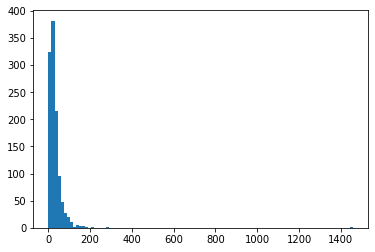

In [ ]:
plt.hist([len(sen) for sen in data_ar_group["Word"]], bins=100)
plt.show()

In [ ]:
len(data_ar)

37486

In [ ]:
len(data_ar_group)

1140

In [ ]:
data_ar_group

sentence #  ...                                            Tag_idx
0        sentence 1  ...  [0, 2, 13, 13, 13, 13, 7, 13, 13, 13, 13, 13, ...
1       sentence 10  ...  [13, 13, 13, 13, 13, 13, 13, 13, 12, 20, 13, 0...
2      sentence 100  ...  [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...
3     sentence 1000  ...  [13, 13, 13, 13, 13, 13, 13, 12, 13, 13, 13, 1...
4     sentence 1001  ...           [13, 13, 13, 13, 12, 16, 13, 12, 16, 13]
...             ...  ...                                                ...
1135   sentence 995  ...  [13, 13, 12, 13, 13, 13, 13, 13, 13, 13, 13, 1...
1136   sentence 996  ...                       [13, 13, 13, 13, 13, 13, 13]
1137   sentence 997  ...  [13, 13, 13, 13, 13, 13, 13, 13, 10, 13, 13, 1...
1138   sentence 998  ...  [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...
1139   sentence 999  ...  [13, 13, 13, 13, 13, 13, 12, 16, 13, 13, 13, 1...

[1140 rows x 5 columns]

In [ ]:
ara_tag2idx

{'B-ENGLISH': 15,
 'B-LOC': 7,
 'B-MIS': 4,
 'B-MIS-1': 11,
 'B-MIS0': 10,
 'B-MIS1': 12,
 'B-MIS1`': 19,
 'B-MIS2': 16,
 'B-MIS3': 1,
 'B-ORG': 0,
 'B-PER': 6,
 'I--ORG': 3,
 'I-LOC': 14,
 'I-MIS': 9,
 'I-MIS0': 5,
 'I-MIS1': 20,
 'I-MIS2': 8,
 'I-MIS3': 18,
 'I-ORG': 2,
 'I-PER': 17,
 'O': 13}

In [ ]:
data_ar.head()

Word    Tag  sentence #  Word_idx  Tag_idx
0     منتخب  B-ORG  sentence 1      6281        0
1  البرتغال  I-ORG  sentence 1       302        2
2      لكرة      O  sentence 1      1636       13
3     القدم      O  sentence 1      7583       13
4        هو      O  sentence 1     10858       13

In [ ]:
data.head()

Sentence #           Word  POS Tag  Word_idx  Tag_idx
0  Sentence: 1      Thousands  NNS   O     15545       10
1          NaN             of   IN   O     14791       10
2          NaN  demonstrators  NNS   O      7235       10
3          NaN           have  VBP   O     15872       10
4          NaN        marched  VBN   O     30504       10

## Training a Neural Network for NER

so now we'll proceed to train the neural network architecture of our model. let’s start by importing all the packages we need to train our neural network.

#### Train & test split

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
data_group.head()

Sentence #  ...                                            Tag_idx
0      Sentence: 1  ...  [10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 1...
1     Sentence: 10  ...  [14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
2    Sentence: 100  ...  [10, 10, 0, 10, 10, 10, 10, 10, 11, 10, 10, 10...
3   Sentence: 1000  ...       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
4  Sentence: 10000  ...  [11, 10, 10, 7, 5, 10, 0, 10, 11, 10, 14, 10, ...

[5 rows x 6 columns]

In [ ]:
data_ar_group.head()

sentence #  ...                                            Tag_idx
0     sentence 1  ...  [0, 2, 13, 13, 13, 13, 7, 13, 13, 13, 13, 13, ...
1    sentence 10  ...  [13, 13, 13, 13, 13, 13, 13, 13, 12, 20, 13, 0...
2   sentence 100  ...  [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...
3  sentence 1000  ...  [13, 13, 13, 13, 13, 13, 13, 12, 13, 13, 13, 1...
4  sentence 1001  ...           [13, 13, 13, 13, 12, 16, 13, 12, 16, 13]

[5 rows x 5 columns]

In [ ]:
def get_pad_train_test_val(data_group, data, tag2idx = tag2idx):

  #Get The Lenght of word voacab
  n_token = len(list(set(data["Word"].to_list())))
  n_tag = len(list(set(data["Tag"].to_list())))

  #pad tokens
  tokens = data_group["Word_idx"].tolist()
  max_len = max([len(x) for x in tokens])

  pad_token = pad_sequences(tokens, maxlen=max_len, dtype="int32", padding="post", value=n_token - 1)

  #Pad Tags (y var) and convert it into one hot encoding
  tags = data_group["Tag_idx"].to_list()
  pad_tags = pad_sequences(tags, maxlen=max_len, dtype="int32", padding="post", value= tag2idx["O"])

  n_tags = len(tag2idx)
  pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]


  #Split train, test and validation set
  tokens_, test_tokens, tags_, test_tags = train_test_split(pad_token, pad_tags, test_size=0.1, random_state=67)
  train_tokens, val_tokens, train_tags, val_tags = train_test_split(pad_token, pad_tags, test_size=0.25, random_state=67)

  print(
      "train_tokens length : ", len(train_tokens),
      "\ntest_tokens length : ", len(test_tokens),
      "\ntest_tags length : ", len(test_tags),
      "\nval_tokens length : ", len(val_tokens),
      "\nval_tags length : ", len(val_tags),
  )

  return train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags

In [ ]:
print("Arabic Train & Test data")
train_tokens_ara, val_tokens_ara, test_tokens_ara, train_tags_ara, val_tags_ara, test_tags_ara = get_pad_train_test_val(data_ar_group, data_ar, ara_tag2idx)


Arabic Train & Test data
train_tokens length :  855 
test_tokens length :  114 
test_tags length :  114 
val_tokens length :  285 
val_tags length :  285


In [ ]:
train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags = get_pad_train_test_val(data_group, data)

train_tokens length :  35969 
test_tokens length :  4796 
test_tags length :  4796 
val_tokens length :  11990 
val_tags length :  11990


In [ ]:
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
 

def get_params(data_group, data, tag2idx= tag2idx):

  vocab_len = len(list(set(data['Word'].to_list())))
  input_dim = vocab_len + 1

  output_dim = 64

  input_length = max([len(s) for s in data_group['Word_idx'].tolist()])
  n_tags = len(tag2idx)
  print (
      "\nVacab : ",vocab_len,
      "\nInput dimensions  : " , input_dim,
      "\nOutput dimensions : " , output_dim,
      "\nInput lenght : " , input_length,
      "\n# Tags : " , n_tags,
  )
  return vocab_len, input_dim, output_dim, input_length, n_tags


In [ ]:
 vocab_len, input_dim, output_dim, input_length, n_tags = get_params(data_group, data, tag2idx= tag2idx)


Vacab :  35178 
Input dimensions  :  35179 
Output dimensions :  64 
Input lenght :  104 
# Tags :  17


In [ ]:
 ara_vocab_len, ara_input_dim, ara_output_dim, ara_input_length, ara_n_tags = get_params(data_ar_group, data_ar, ara_tag2idx)



Vacab :  11138 
Input dimensions  :  11139 
Output dimensions :  64 
Input lenght :  1457 
# Tags :  21


Now, let us create layers that will take the dimensions of the LSTM layer and give the maximum length and maximum tags as output:

In [ ]:
def create_model(input_dim, output_dim, input_length, n_tags):
  model = Sequential()

  # Add Embedding layer
  model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

  # Add bidirectional LSTM
  model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

  # Add LSTM
  model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

  # Add timeDistributed Layer
  model.add(TimeDistributed(Dense(n_tags, activation="relu")))

  #Optimiser 
  # adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
ner_model = create_model(input_dim, output_dim, input_length, n_tags)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 104, 64)           2251456   
_________________________________________________________________
bidirectional (Bidirectional (None, 104, 128)          66048     
_________________________________________________________________
lstm_1 (LSTM)                (None, 104, 64)           49408     
_________________________________________________________________
time_distributed (TimeDistri (None, 104, 17)           1105      
Total params: 2,368,017
Trainable params: 2,368,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ara_ner_model = create_model(ara_input_dim, ara_output_dim, ara_input_length, ara_n_tags)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1457, 64)          712896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1457, 128)         66048     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1457, 64)          49408     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1457, 21)          1365      
Total params: 829,717
Trainable params: 829,717
Non-trainable params: 0
_________________________________________________________________


### Train The Model 

In [ ]:
def train_model(X, y, model):
    loss = list()
    for i in range(25):
        # fit model for one epoch on this sequence
        hist = model.fit(X, y, batch_size=1000, verbose=1, epochs=1, validation_split=0.2)
        loss.append(hist.history['loss'][0])
    return loss

#### English Model training

  Training will take over 1hour ..

In [ ]:
results = pd.DataFrame()
plot_model(ner_model)
results['with_add_lstm_english'] = train_model(train_tokens, np.array(train_tags), ner_model)

10/29 [=========>....................] - ETA: 1:43 - loss: 1.2132 - accuracy: 0.8708

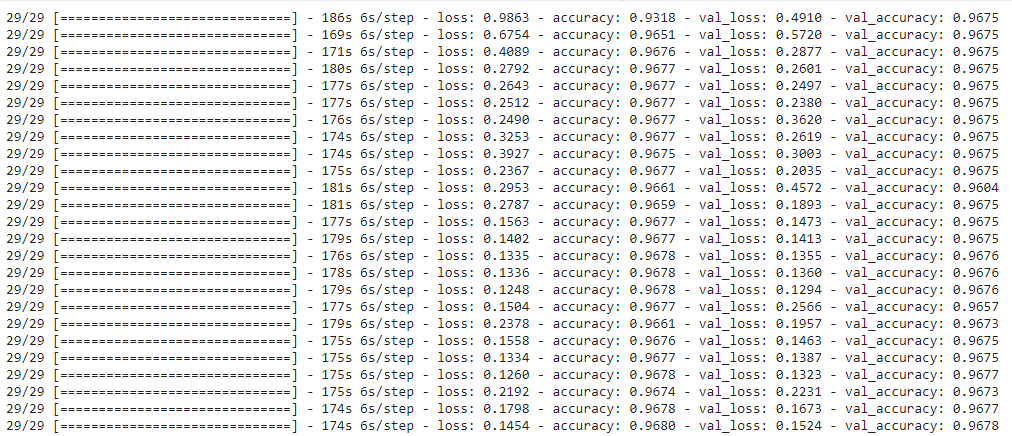

#### Arabic Model training

In [ ]:
plot_model(ara_ner_model)
results['with_add_lstm_arabic'] = train_model(ara_train_tokens, np.array(ara_train_tags), ara_ner_model)

In [ ]:
print(results)

### Model Evaluation
we will use the spacy library in Python to test our NER model

In [ ]:
preds = model.predict(test_tokens)

In [ ]:
english_text

In [ ]:
# nlp = spacy.load('en_core_web_sm')
en_text = nlp(english_text)
displacy.render(en_text, style = 'ent', jupyter=True)

In [ ]:
# nlp = spacy.load('en_core_web_sm')
en_text = nlp(ara)
displacy.render(en_text, style = 'ent', jupyter=True)

## Printing Dependencies

In [ ]:
try :
  %load_ext watermark
except: 
  !pip install watermark

In [ ]:
%load_ext watermark
%watermark --iversion